In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
my_df=pd.read_csv('Aufgabe_Analyse-NEU.csv')

my_df.shape

(500, 13)

In [17]:
my_df.sample(5)

,Unnamed: 0,Feature A,Feature B,Feature C,Feature D,Feature E,Feature F,Feature G,Feature H,Feature I,Feature J,Feature K,Target
316,316,0.447325,-1.340174,NaN,-2.149088,-0.199482,0.070974,-0.211416,1.612898,Imperial,Knight,Ahsoka Tano,7.308942
27,27,0.527033,-0.403863,1.406550,-0.481323,0.144157,1.335351,0.318571,-0.455567,NaN,Padawan,NaN,NaN
362,362,1.561242,0.450288,-1.611014,-0.455813,1.197020,-0.836314,-0.180727,0.117575,Imperial,Knight,Anakin Skywalker,-55.161034
23,23,0.216090,0.015824,0.276200,-0.279934,0.148225,-0.590666,0.558917,NaN,Imperial,NaN,Ahsoka Tano,9.378485
388,388,1.937832,-0.315917,0.458336,0.725247,0.580816,0.489522,0.389743,-0.281913,Rebel,Knight,Ahsoka Tano,44.620265


In [18]:
my_df.drop(my_df.columns[my_df.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature A  453 non-null    float64
 1   Feature B  441 non-null    float64
 2   Feature C  427 non-null    float64
 3   Feature D  461 non-null    float64
 4   Feature E  447 non-null    float64
 5   Feature F  450 non-null    float64
 6   Feature G  445 non-null    float64
 7   Feature H  437 non-null    float64
 8   Feature I  461 non-null    object 
 9   Feature J  450 non-null    object 
 10  Feature K  455 non-null    object 
 11  Target     447 non-null    float64
dtypes: float64(9), object(3)
memory usage: 47.0+ KB


In [19]:
my_df.isnull().sum()

Feature A    47
Feature B    59
Feature C    73
Feature D    39
Feature E    53
Feature F    50
Feature G    55
Feature H    63
Feature I    39
Feature J    50
Feature K    45
Target       53
dtype: int64

<Axes: xlabel='Target', ylabel='Count'>

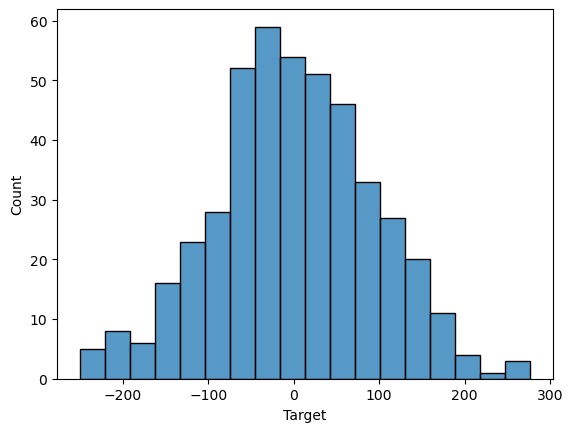

In [20]:
sns.histplot(x = my_df.Target)

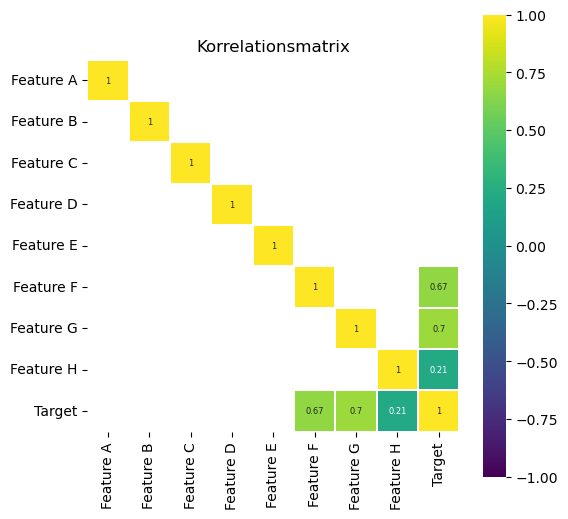

In [21]:
nummerisch = my_df.select_dtypes(include=['float64', 'int64', 'int16', 'int32'])
corr_matrix = nummerisch.corr()
plt.figure(figsize=(6, 6))

sns.heatmap(corr_matrix[(corr_matrix >= 0.2) | (corr_matrix <= -0.2)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 6}, square=True)
plt.title('Korrelationsmatrix')
plt.show()

In [22]:
df_num_corr = my_df.corr(numeric_only=True)['Target']
print(df_num_corr)

Feature A    0.057266
Feature B    0.159330
Feature C    0.102592
Feature D    0.016819
Feature E    0.004441
Feature F    0.671373
Feature G    0.697075
Feature H    0.209679
Target       1.000000
Name: Target, dtype: float64


In [23]:
golden_features_list = df_num_corr[abs(df_num_corr) > -1].sort_values(ascending=False)
print("There are {} strongly correlated values with Target:\n{}".format(len(golden_features_list), golden_features_list))

There are 9 strongly correlated values with Target:
Target       1.000000
Feature G    0.697075
Feature F    0.671373
Feature H    0.209679
Feature B    0.159330
Feature C    0.102592
Feature A    0.057266
Feature D    0.016819
Feature E    0.004441
Name: Target, dtype: float64


In [24]:
df_not_num = my_df.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 3 non numerical features including:
['Feature I', 'Feature J', 'Feature K']


In [25]:
dtypes = my_df.dtypes
categorical_features = dtypes[dtypes == 'object'].index.tolist()

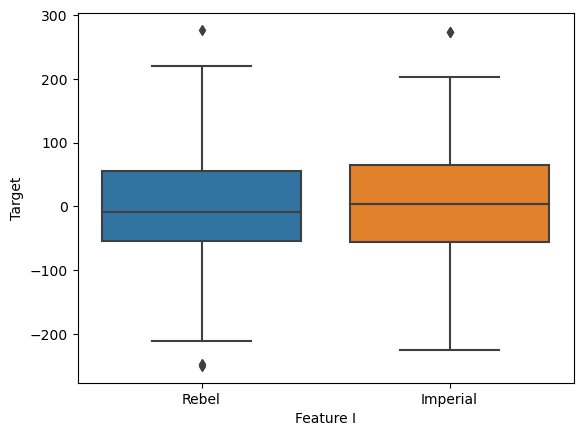

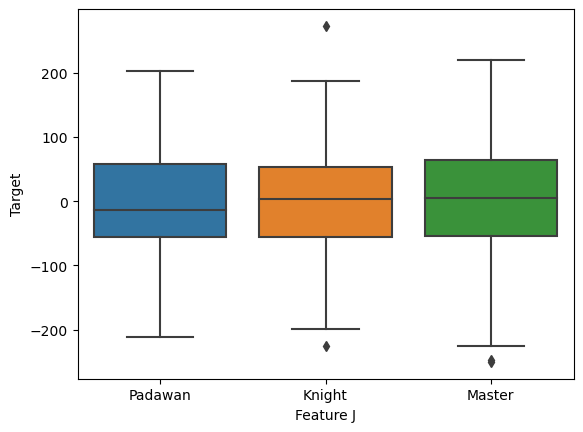

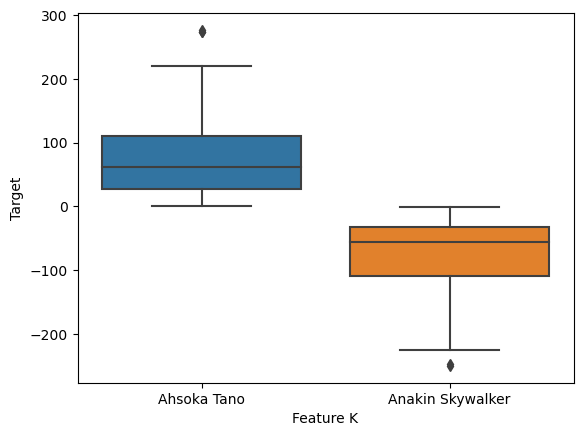

In [26]:
for feature in df_not_num:
        sns.boxplot(x=feature, y='Target', data=my_df)
        plt.show()